In [1]:
import torch
from my_nn_functions import trainNet, get_cifar_dataloaders_sizes, get_roc, plot_history
from torchsummary import summary

In [2]:
dataloaders, dataset_sizes, class_names = get_cifar_dataloaders_sizes()

Files already downloaded and verified


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [4]:
import torchvision

In [5]:
upscale = True
model = torchvision.models.resnet18(pretrained=True)
model.avgpool = torch.nn.AvgPool2d(kernel_size=7, stride=1, padding=0, ceil_mode=False, count_include_pad=True)
model.fc = torch.nn.Linear( 4*512, 10)
model = model.to(device)
summary(model, (3, 32*8, 32*8))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 128, 128]           9,408
       BatchNorm2d-2         [-1, 64, 128, 128]             128
              ReLU-3         [-1, 64, 128, 128]               0
         MaxPool2d-4           [-1, 64, 64, 64]               0
            Conv2d-5           [-1, 64, 64, 64]          36,864
       BatchNorm2d-6           [-1, 64, 64, 64]             128
              ReLU-7           [-1, 64, 64, 64]               0
            Conv2d-8           [-1, 64, 64, 64]          36,864
       BatchNorm2d-9           [-1, 64, 64, 64]             128
             ReLU-10           [-1, 64, 64, 64]               0
       BasicBlock-11           [-1, 64, 64, 64]               0
           Conv2d-12           [-1, 64, 64, 64]          36,864
      BatchNorm2d-13           [-1, 64, 64, 64]             128
             ReLU-14           [-1, 64,

In [6]:
optimizer = torch.optim.Adam(model.parameters(), weight_decay=1e-4)
loss = torch.nn.CrossEntropyLoss()

In [7]:
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 5, 0.75)

In [8]:
best_model, loss_hist, acc_hist = trainNet(model, 35, optimizer, loss, dataloaders, dataset_sizes, device, scheduler=lr_scheduler, upscale=True)

===== TRAIN STARTED =====


Epoch 1/35
----------


Epoch 1, 24.94%  train_loss: 1.179  train acc: 0.59  took: 77.58s
Epoch 1, 49.87%  train_loss: 1.012  train acc: 0.65  took: 73.55s
Epoch 1, 74.81%  train_loss: 0.929  train acc: 0.68  took: 73.57s
Epoch 1, 99.74%  train_loss: 0.866  train acc: 0.70  took: 73.50s
Phase: train Loss: 0.865 Acc: 0.70


Phase: val Loss: 0.622 Acc: 0.78
Epoch 2/35
----------


Epoch 2, 24.94%  train_loss: 0.619  train acc: 0.79  took: 74.55s
Epoch 2, 49.87%  train_loss: 0.609  train acc: 0.79  took: 73.22s
Epoch 2, 74.81%  train_loss: 0.600  train acc: 0.79  took: 75.08s
Epoch 2, 99.74%  train_loss: 0.588  train acc: 0.80  took: 75.67s
Phase: train Loss: 0.588 Acc: 0.80


Phase: val Loss: 0.508 Acc: 0.83
Epoch 3/35
----------


Epoch 3, 24.94%  train_loss: 0.509  train acc: 0.83  took: 75.05s
Epoch 3, 49.87%  train_loss: 0.506  train acc: 0.83  took: 75.36s
Epoch 3, 74.81%  train_loss: 0.506  train acc: 0.83  took: 74.91s
Epoch 3, 99.74%  train_loss: 0.508  train acc: 0.83  took: 75.51s
Phase: train Loss: 0.508 Acc: 0.83


Phase: val Loss: 0.447 Acc: 0.85
Epoch 4/35
----------


Epoch 4, 24.94%  train_loss: 0.482  train acc: 0.84  took: 74.45s
Epoch 4, 49.87%  train_loss: 0.473  train acc: 0.84  took: 75.35s
Epoch 4, 74.81%  train_loss: 0.470  train acc: 0.84  took: 73.91s
Epoch 4, 99.74%  train_loss: 0.464  train acc: 0.84  took: 74.59s
Phase: train Loss: 0.464 Acc: 0.84


Phase: val Loss: 0.442 Acc: 0.86
Epoch 5/35
----------


Epoch 5, 24.94%  train_loss: 0.423  train acc: 0.86  took: 75.42s
Epoch 5, 49.87%  train_loss: 0.422  train acc: 0.85  took: 74.22s
Epoch 5, 74.81%  train_loss: 0.426  train acc: 0.85  took: 62.89s
Epoch 5, 99.74%  train_loss: 0.429  train acc: 0.85  took: 53.76s
Phase: train Loss: 0.429 Acc: 0.85


Phase: val Loss: 0.404 Acc: 0.86
Epoch 6/35
----------


Epoch 6, 24.94%  train_loss: 0.338  train acc: 0.88  took: 53.12s
Epoch 6, 49.87%  train_loss: 0.342  train acc: 0.88  took: 53.63s
Epoch 6, 74.81%  train_loss: 0.348  train acc: 0.88  took: 53.72s
Epoch 6, 99.74%  train_loss: 0.350  train acc: 0.88  took: 53.38s
Phase: train Loss: 0.350 Acc: 0.88


Phase: val Loss: 0.312 Acc: 0.89
Epoch 7/35
----------


Epoch 7, 24.94%  train_loss: 0.338  train acc: 0.88  took: 53.20s
Epoch 7, 49.87%  train_loss: 0.335  train acc: 0.88  took: 54.19s
Epoch 7, 74.81%  train_loss: 0.335  train acc: 0.88  took: 53.15s
Epoch 7, 99.74%  train_loss: 0.337  train acc: 0.88  took: 53.83s
Phase: train Loss: 0.337 Acc: 0.88


Phase: val Loss: 0.342 Acc: 0.88
Epoch 8/35
----------


Epoch 8, 24.94%  train_loss: 0.319  train acc: 0.89  took: 52.89s
Epoch 8, 49.87%  train_loss: 0.318  train acc: 0.89  took: 52.91s
Epoch 8, 74.81%  train_loss: 0.319  train acc: 0.89  took: 52.67s
Epoch 8, 99.74%  train_loss: 0.324  train acc: 0.89  took: 53.11s
Phase: train Loss: 0.324 Acc: 0.89


Phase: val Loss: 0.379 Acc: 0.87
Epoch 9/35
----------


Epoch 9, 24.94%  train_loss: 0.304  train acc: 0.90  took: 52.25s
Epoch 9, 49.87%  train_loss: 0.304  train acc: 0.90  took: 52.08s
Epoch 9, 74.81%  train_loss: 0.309  train acc: 0.89  took: 52.62s
Epoch 9, 99.74%  train_loss: 0.310  train acc: 0.89  took: 52.91s
Phase: train Loss: 0.310 Acc: 0.89


Phase: val Loss: 0.285 Acc: 0.91
Epoch 10/35
----------


Epoch 10, 24.94%  train_loss: 0.292  train acc: 0.90  took: 52.56s
Epoch 10, 49.87%  train_loss: 0.293  train acc: 0.90  took: 52.15s
Epoch 10, 74.81%  train_loss: 0.297  train acc: 0.90  took: 52.49s
Epoch 10, 99.74%  train_loss: 0.299  train acc: 0.90  took: 52.92s
Phase: train Loss: 0.299 Acc: 0.90


Phase: val Loss: 0.277 Acc: 0.91
Epoch 11/35
----------


Epoch 11, 24.94%  train_loss: 0.241  train acc: 0.92  took: 52.14s
Epoch 11, 49.87%  train_loss: 0.239  train acc: 0.92  took: 52.76s
Epoch 11, 74.81%  train_loss: 0.241  train acc: 0.92  took: 52.12s
Epoch 11, 99.74%  train_loss: 0.246  train acc: 0.92  took: 52.10s
Phase: train Loss: 0.246 Acc: 0.92


Phase: val Loss: 0.235 Acc: 0.92
Epoch 12/35
----------


Epoch 12, 24.94%  train_loss: 0.225  train acc: 0.92  took: 51.80s
Epoch 12, 49.87%  train_loss: 0.233  train acc: 0.92  took: 52.57s
Epoch 12, 74.81%  train_loss: 0.233  train acc: 0.92  took: 52.67s
Epoch 12, 99.74%  train_loss: 0.235  train acc: 0.92  took: 52.33s
Phase: train Loss: 0.235 Acc: 0.92


Phase: val Loss: 0.246 Acc: 0.92
Epoch 13/35
----------


Epoch 13, 24.94%  train_loss: 0.214  train acc: 0.93  took: 52.21s
Epoch 13, 49.87%  train_loss: 0.210  train acc: 0.93  took: 52.63s
Epoch 13, 74.81%  train_loss: 0.221  train acc: 0.92  took: 52.52s
Epoch 13, 99.74%  train_loss: 0.225  train acc: 0.92  took: 52.19s
Phase: train Loss: 0.225 Acc: 0.92


Phase: val Loss: 0.265 Acc: 0.91
Epoch 14/35
----------


Epoch 14, 24.94%  train_loss: 0.217  train acc: 0.93  took: 52.29s
Epoch 14, 49.87%  train_loss: 0.205  train acc: 0.93  took: 51.96s
Epoch 14, 74.81%  train_loss: 0.213  train acc: 0.93  took: 52.96s
Epoch 14, 99.74%  train_loss: 0.218  train acc: 0.92  took: 52.71s
Phase: train Loss: 0.217 Acc: 0.92


Phase: val Loss: 0.263 Acc: 0.91
Epoch 15/35
----------


Epoch 15, 24.94%  train_loss: 0.199  train acc: 0.93  took: 52.92s
Epoch 15, 49.87%  train_loss: 0.207  train acc: 0.93  took: 52.24s
Epoch 15, 74.81%  train_loss: 0.212  train acc: 0.93  took: 52.45s
Epoch 15, 99.74%  train_loss: 0.216  train acc: 0.93  took: 52.62s
Phase: train Loss: 0.217 Acc: 0.93


Phase: val Loss: 0.278 Acc: 0.91
Epoch 16/35
----------


Epoch 16, 24.94%  train_loss: 0.182  train acc: 0.94  took: 52.08s
Epoch 16, 49.87%  train_loss: 0.182  train acc: 0.94  took: 52.65s
Epoch 16, 74.81%  train_loss: 0.182  train acc: 0.94  took: 53.10s
Epoch 16, 99.74%  train_loss: 0.182  train acc: 0.94  took: 51.97s
Phase: train Loss: 0.182 Acc: 0.94


Phase: val Loss: 0.230 Acc: 0.92
Epoch 17/35
----------


Epoch 17, 24.94%  train_loss: 0.144  train acc: 0.95  took: 52.23s
Epoch 17, 49.87%  train_loss: 0.156  train acc: 0.95  took: 52.37s
Epoch 17, 74.81%  train_loss: 0.163  train acc: 0.94  took: 52.27s
Epoch 17, 99.74%  train_loss: 0.169  train acc: 0.94  took: 52.29s
Phase: train Loss: 0.169 Acc: 0.94


Phase: val Loss: 0.225 Acc: 0.93
Epoch 18/35
----------


Epoch 18, 24.94%  train_loss: 0.163  train acc: 0.94  took: 51.79s
Epoch 18, 49.87%  train_loss: 0.163  train acc: 0.94  took: 52.91s
Epoch 18, 74.81%  train_loss: 0.165  train acc: 0.94  took: 52.15s
Epoch 18, 99.74%  train_loss: 0.167  train acc: 0.94  took: 51.75s
Phase: train Loss: 0.167 Acc: 0.94


Phase: val Loss: 0.263 Acc: 0.92
Epoch 19/35
----------


Epoch 19, 24.94%  train_loss: 0.150  train acc: 0.95  took: 52.47s
Epoch 19, 49.87%  train_loss: 0.153  train acc: 0.95  took: 52.13s
Epoch 19, 74.81%  train_loss: 0.162  train acc: 0.94  took: 52.14s
Epoch 19, 99.74%  train_loss: 0.161  train acc: 0.94  took: 52.16s
Phase: train Loss: 0.161 Acc: 0.94


Phase: val Loss: 0.234 Acc: 0.92
Epoch 20/35
----------


Epoch 20, 24.94%  train_loss: 0.145  train acc: 0.95  took: 51.93s
Epoch 20, 49.87%  train_loss: 0.148  train acc: 0.95  took: 52.32s
Epoch 20, 74.81%  train_loss: 0.151  train acc: 0.95  took: 52.39s
Epoch 20, 99.74%  train_loss: 0.155  train acc: 0.94  took: 52.76s
Phase: train Loss: 0.156 Acc: 0.94


Phase: val Loss: 0.244 Acc: 0.92
Epoch 21/35
----------


Epoch 21, 24.94%  train_loss: 0.139  train acc: 0.95  took: 51.67s
Epoch 21, 49.87%  train_loss: 0.132  train acc: 0.95  took: 52.55s
Epoch 21, 74.81%  train_loss: 0.131  train acc: 0.95  took: 52.40s
Epoch 21, 99.74%  train_loss: 0.129  train acc: 0.96  took: 52.75s
Phase: train Loss: 0.129 Acc: 0.96


Phase: val Loss: 0.222 Acc: 0.93
Epoch 22/35
----------


Epoch 22, 24.94%  train_loss: 0.111  train acc: 0.96  took: 52.26s
Epoch 22, 49.87%  train_loss: 0.119  train acc: 0.96  took: 52.41s
Epoch 22, 74.81%  train_loss: 0.123  train acc: 0.96  took: 52.05s
Epoch 22, 99.74%  train_loss: 0.124  train acc: 0.96  took: 51.84s
Phase: train Loss: 0.125 Acc: 0.96


Phase: val Loss: 0.238 Acc: 0.93
Epoch 23/35
----------


Epoch 23, 24.94%  train_loss: 0.113  train acc: 0.96  took: 52.55s
Epoch 23, 49.87%  train_loss: 0.115  train acc: 0.96  took: 52.84s
Epoch 23, 74.81%  train_loss: 0.117  train acc: 0.96  took: 51.93s
Epoch 23, 99.74%  train_loss: 0.118  train acc: 0.96  took: 52.54s
Phase: train Loss: 0.118 Acc: 0.96


Phase: val Loss: 0.229 Acc: 0.93
Epoch 24/35
----------


Epoch 24, 24.94%  train_loss: 0.112  train acc: 0.96  took: 52.33s
Epoch 24, 49.87%  train_loss: 0.110  train acc: 0.96  took: 52.18s
Epoch 24, 74.81%  train_loss: 0.111  train acc: 0.96  took: 53.56s
Epoch 24, 99.74%  train_loss: 0.114  train acc: 0.96  took: 53.14s
Phase: train Loss: 0.114 Acc: 0.96


Phase: val Loss: 0.233 Acc: 0.93
Epoch 25/35
----------


Epoch 25, 24.94%  train_loss: 0.105  train acc: 0.96  took: 52.77s
Epoch 25, 49.87%  train_loss: 0.107  train acc: 0.96  took: 52.90s
Epoch 25, 74.81%  train_loss: 0.111  train acc: 0.96  took: 52.92s
Epoch 25, 99.74%  train_loss: 0.115  train acc: 0.96  took: 53.05s
Phase: train Loss: 0.115 Acc: 0.96


Phase: val Loss: 0.244 Acc: 0.93
Epoch 26/35
----------


Epoch 26, 24.94%  train_loss: 0.091  train acc: 0.97  took: 52.76s
Epoch 26, 49.87%  train_loss: 0.090  train acc: 0.97  took: 52.38s
Epoch 26, 74.81%  train_loss: 0.092  train acc: 0.97  took: 53.33s
Epoch 26, 99.74%  train_loss: 0.091  train acc: 0.97  took: 52.25s
Phase: train Loss: 0.091 Acc: 0.97


Phase: val Loss: 0.213 Acc: 0.94
Epoch 27/35
----------


Epoch 27, 24.94%  train_loss: 0.084  train acc: 0.97  took: 53.02s
Epoch 27, 49.87%  train_loss: 0.084  train acc: 0.97  took: 53.17s
Epoch 27, 74.81%  train_loss: 0.085  train acc: 0.97  took: 53.80s
Epoch 27, 99.74%  train_loss: 0.090  train acc: 0.97  took: 52.76s
Phase: train Loss: 0.090 Acc: 0.97


Phase: val Loss: 0.215 Acc: 0.94
Epoch 28/35
----------


Epoch 28, 24.94%  train_loss: 0.081  train acc: 0.97  took: 53.00s
Epoch 28, 49.87%  train_loss: 0.082  train acc: 0.97  took: 53.12s
Epoch 28, 74.81%  train_loss: 0.082  train acc: 0.97  took: 53.40s
Epoch 28, 99.74%  train_loss: 0.083  train acc: 0.97  took: 52.69s
Phase: train Loss: 0.084 Acc: 0.97


Phase: val Loss: 0.234 Acc: 0.93
Epoch 29/35
----------


Epoch 29, 24.94%  train_loss: 0.076  train acc: 0.97  took: 52.43s
Epoch 29, 49.87%  train_loss: 0.079  train acc: 0.97  took: 53.53s
Epoch 29, 74.81%  train_loss: 0.080  train acc: 0.97  took: 52.80s
Epoch 29, 99.74%  train_loss: 0.084  train acc: 0.97  took: 52.98s
Phase: train Loss: 0.084 Acc: 0.97


Phase: val Loss: 0.230 Acc: 0.93
Epoch 30/35
----------


Epoch 30, 24.94%  train_loss: 0.073  train acc: 0.98  took: 52.36s
Epoch 30, 49.87%  train_loss: 0.076  train acc: 0.97  took: 52.28s
Epoch 30, 74.81%  train_loss: 0.078  train acc: 0.97  took: 52.44s
Epoch 30, 99.74%  train_loss: 0.082  train acc: 0.97  took: 52.51s
Phase: train Loss: 0.082 Acc: 0.97


Phase: val Loss: 0.218 Acc: 0.93
Epoch 31/35
----------


Epoch 31, 24.94%  train_loss: 0.065  train acc: 0.98  took: 52.55s
Epoch 31, 49.87%  train_loss: 0.062  train acc: 0.98  took: 52.73s
Epoch 31, 74.81%  train_loss: 0.064  train acc: 0.98  took: 52.86s
Epoch 31, 99.74%  train_loss: 0.065  train acc: 0.98  took: 52.78s
Phase: train Loss: 0.065 Acc: 0.98


Phase: val Loss: 0.229 Acc: 0.93
Epoch 32/35
----------


Epoch 32, 24.94%  train_loss: 0.061  train acc: 0.98  took: 52.18s
Epoch 32, 49.87%  train_loss: 0.060  train acc: 0.98  took: 53.00s
Epoch 32, 74.81%  train_loss: 0.062  train acc: 0.98  took: 52.75s
Epoch 32, 99.74%  train_loss: 0.061  train acc: 0.98  took: 52.77s
Phase: train Loss: 0.061 Acc: 0.98


Phase: val Loss: 0.236 Acc: 0.93
Epoch 33/35
----------


Epoch 33, 24.94%  train_loss: 0.057  train acc: 0.98  took: 52.96s
Epoch 33, 49.87%  train_loss: 0.058  train acc: 0.98  took: 52.69s
Epoch 33, 74.81%  train_loss: 0.059  train acc: 0.98  took: 52.74s
Epoch 33, 99.74%  train_loss: 0.062  train acc: 0.98  took: 52.64s
Phase: train Loss: 0.062 Acc: 0.98


Phase: val Loss: 0.230 Acc: 0.93
Epoch 34/35
----------


Epoch 34, 24.94%  train_loss: 0.054  train acc: 0.98  took: 52.52s
Epoch 34, 49.87%  train_loss: 0.060  train acc: 0.98  took: 52.33s
Epoch 34, 74.81%  train_loss: 0.059  train acc: 0.98  took: 52.51s
Epoch 34, 99.74%  train_loss: 0.059  train acc: 0.98  took: 52.77s
Phase: train Loss: 0.059 Acc: 0.98


Phase: val Loss: 0.241 Acc: 0.94
Epoch 35/35
----------


Epoch 35, 24.94%  train_loss: 0.056  train acc: 0.98  took: 53.23s
Epoch 35, 49.87%  train_loss: 0.056  train acc: 0.98  took: 52.46s
Epoch 35, 74.81%  train_loss: 0.058  train acc: 0.98  took: 52.55s
Epoch 35, 99.74%  train_loss: 0.059  train acc: 0.98  took: 52.74s
Phase: train Loss: 0.059 Acc: 0.98


Phase: val Loss: 0.242 Acc: 0.94

Training complete in 143m 56.57s
Best val Acc: 0.9363
===== TRAIN FINISHED =====


In [10]:
torch.save(best_model.state_dict(), 'models/resnet.pt')

In [12]:
import importlib


In [15]:
import my_nn_functions

In [21]:
importlib.reload(my_nn_functions)

<module 'my_nn_functions' from '/home/pitrosk/notebooks/final/my_nn_functions.py'>

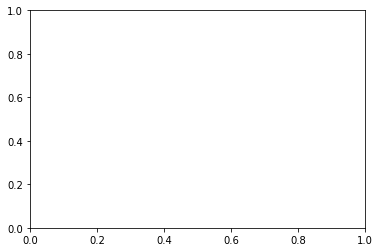

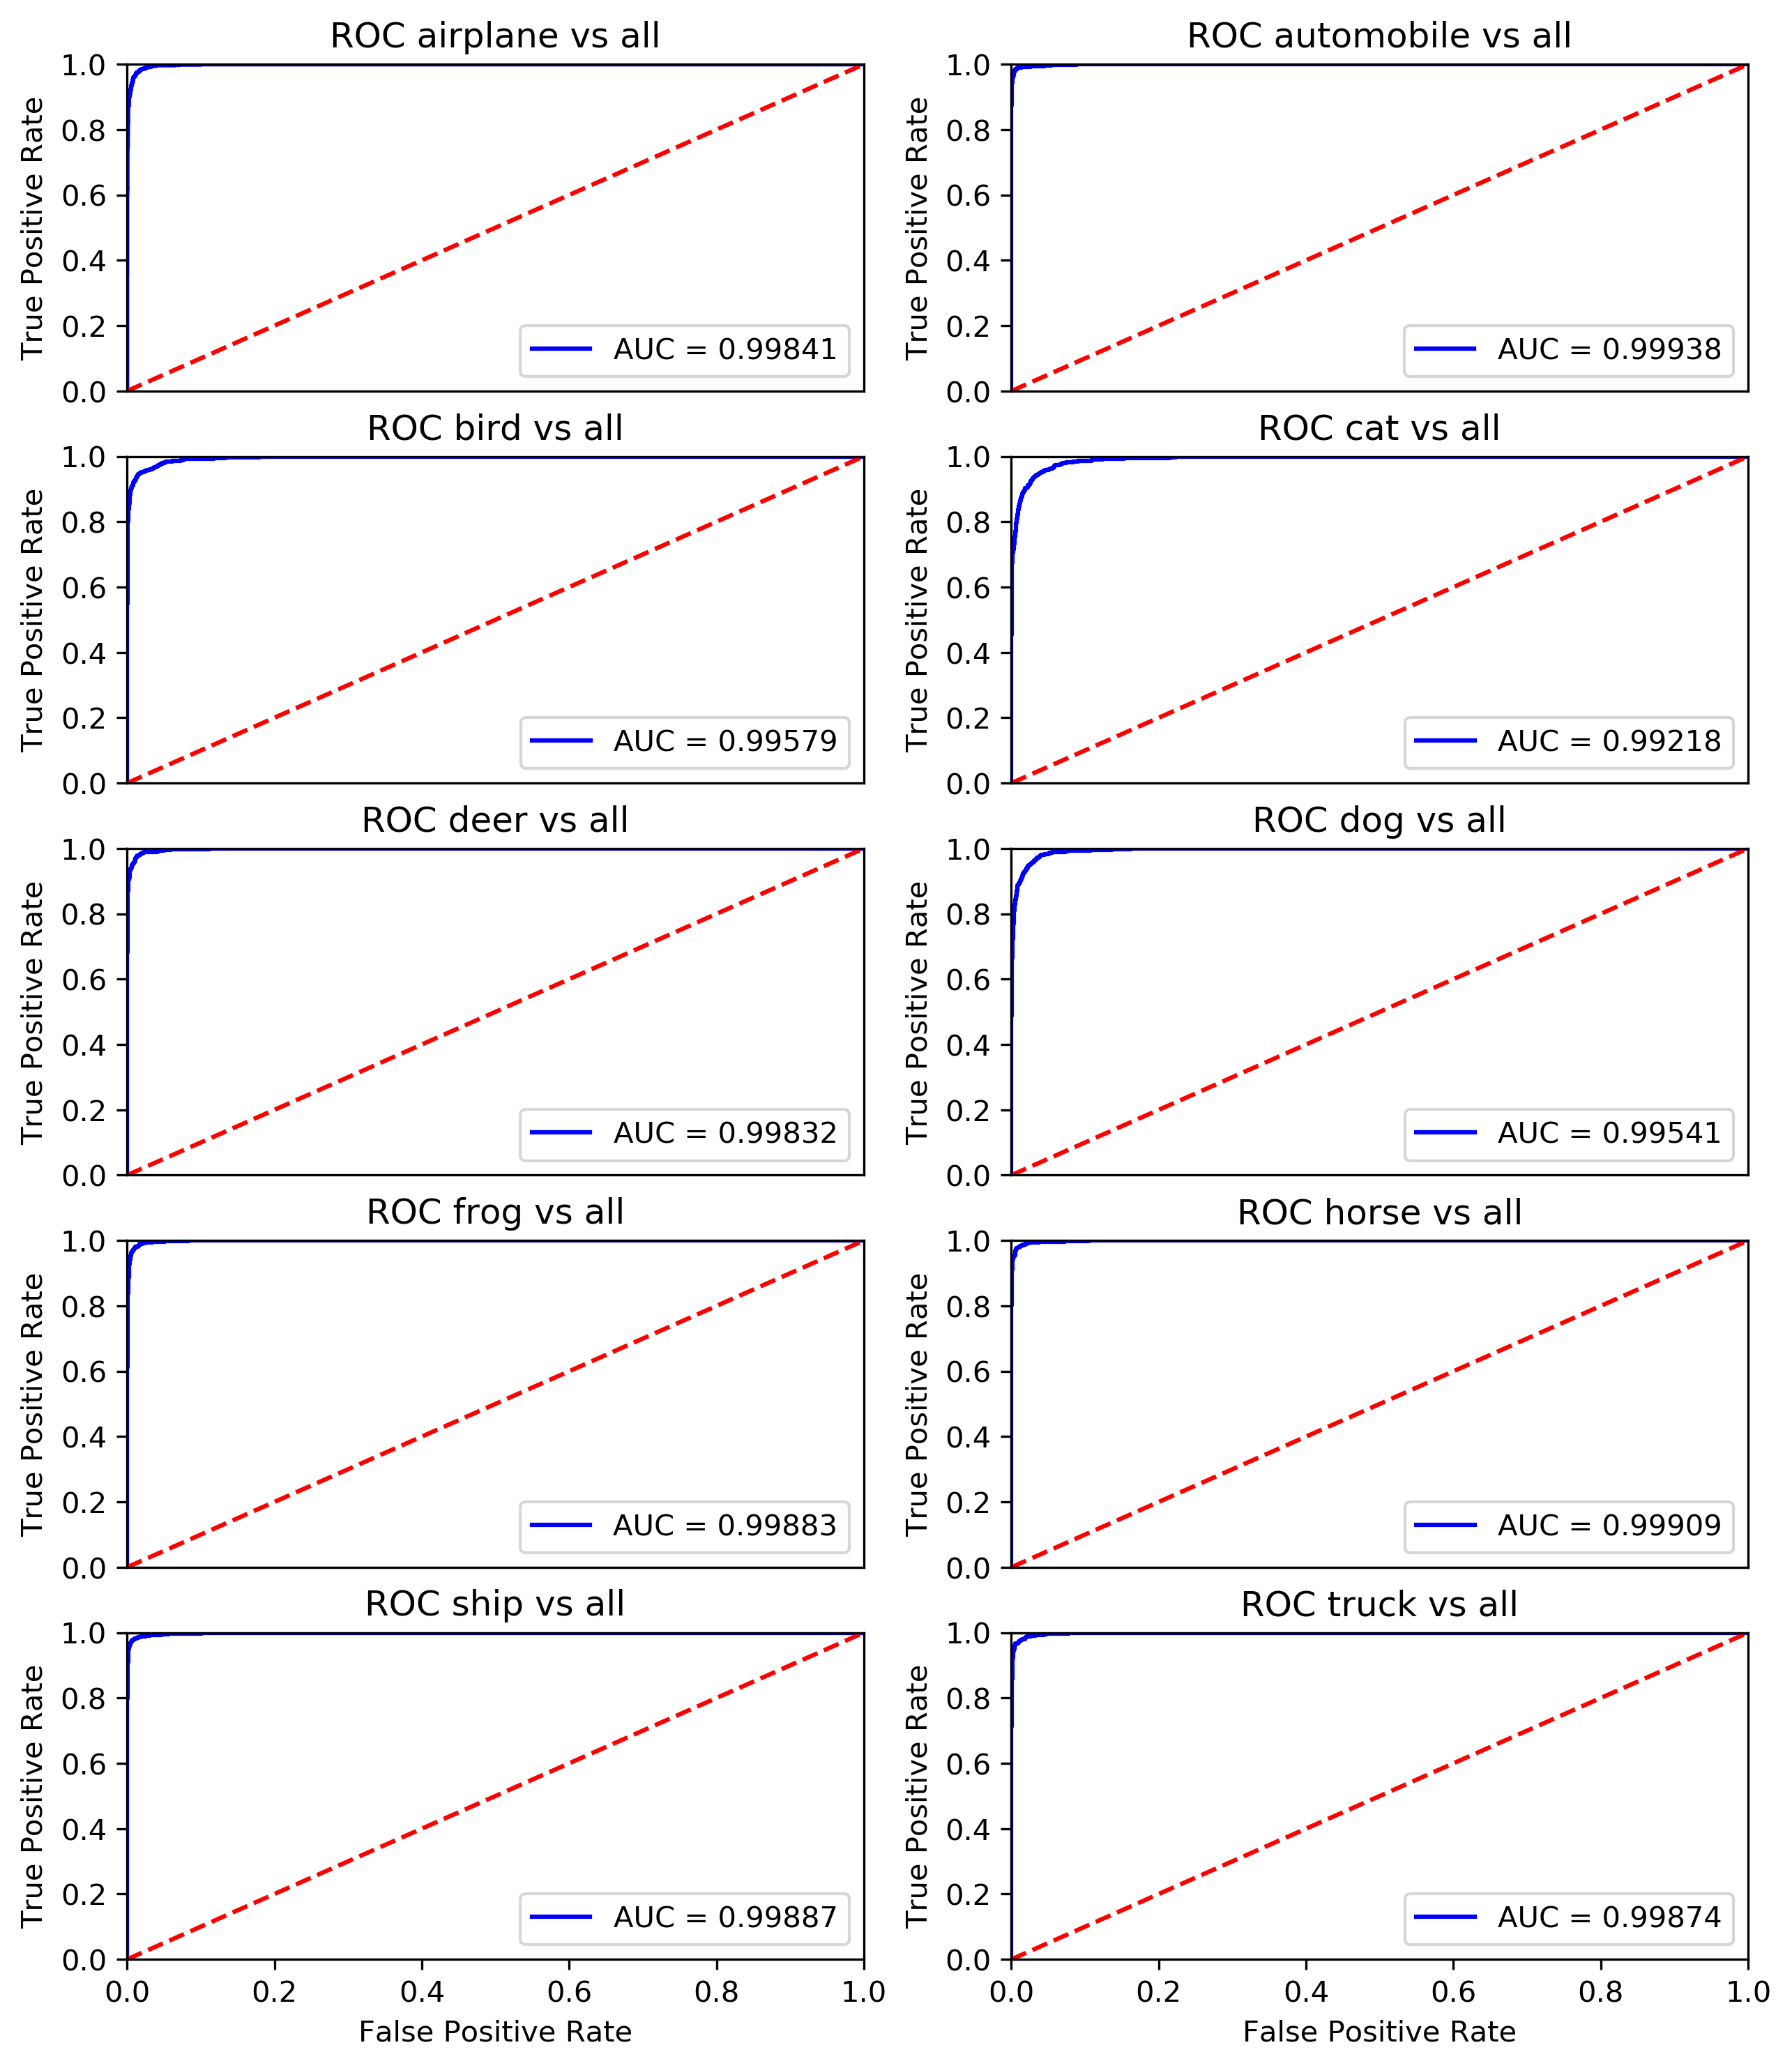

In [18]:
my_nn_functions.get_roc(best_model, dataloaders, class_names, 'resnet18', upscale=True)

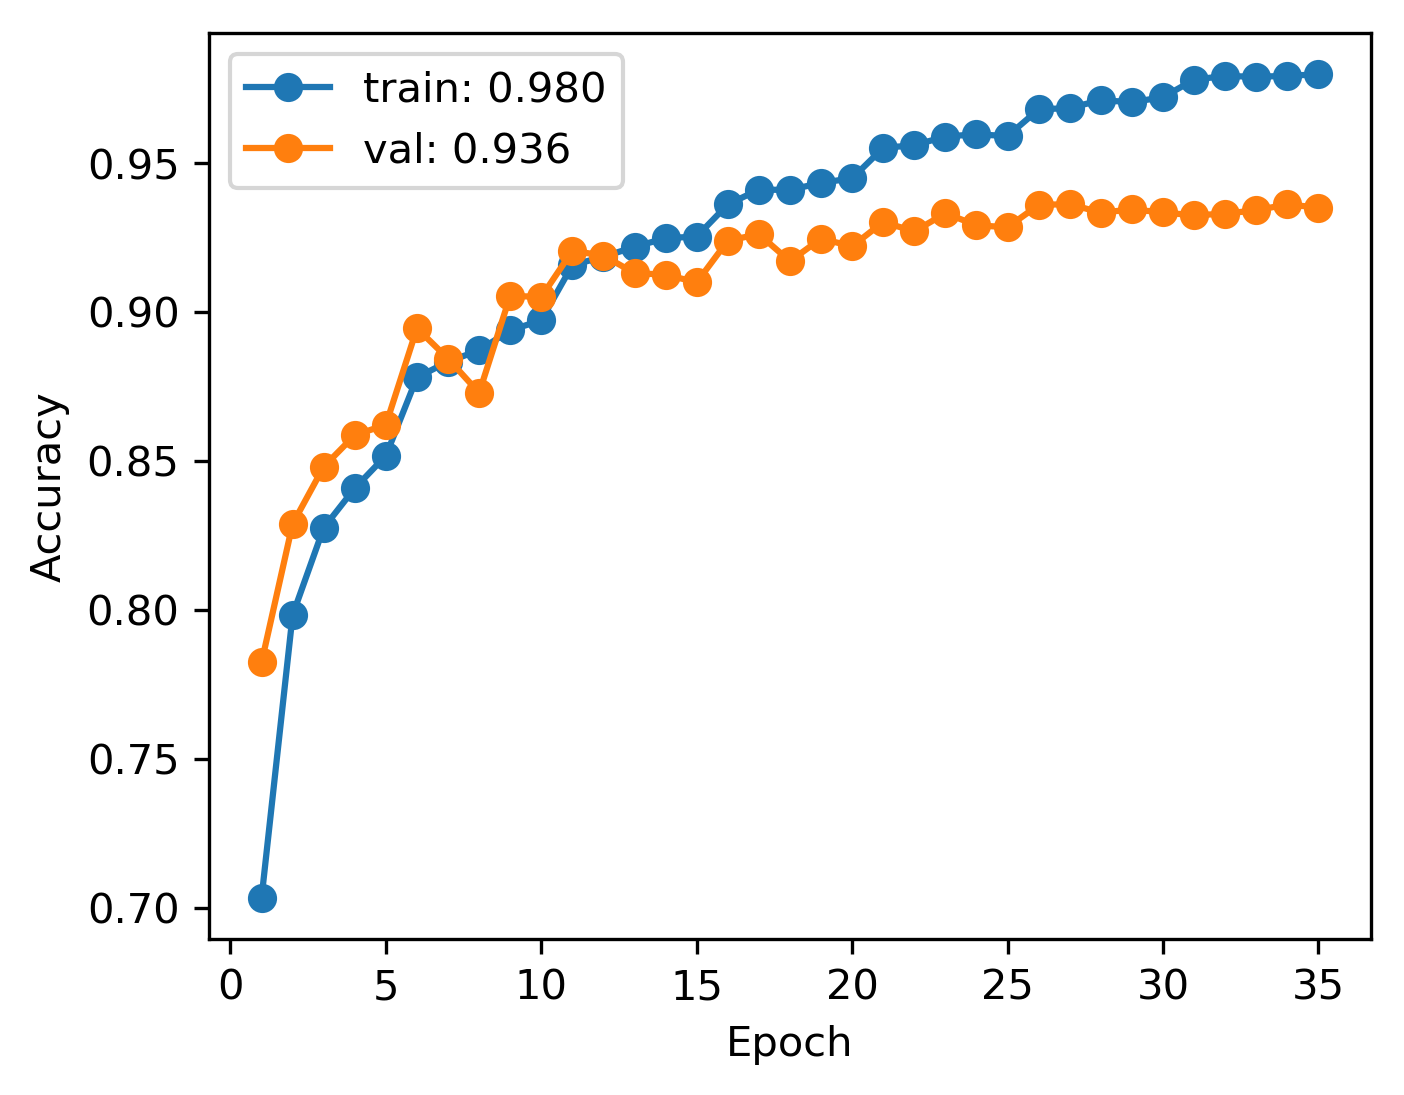

In [23]:
my_nn_functions.plot_history(acc_hist, 'Accuracy', 'resnet18')

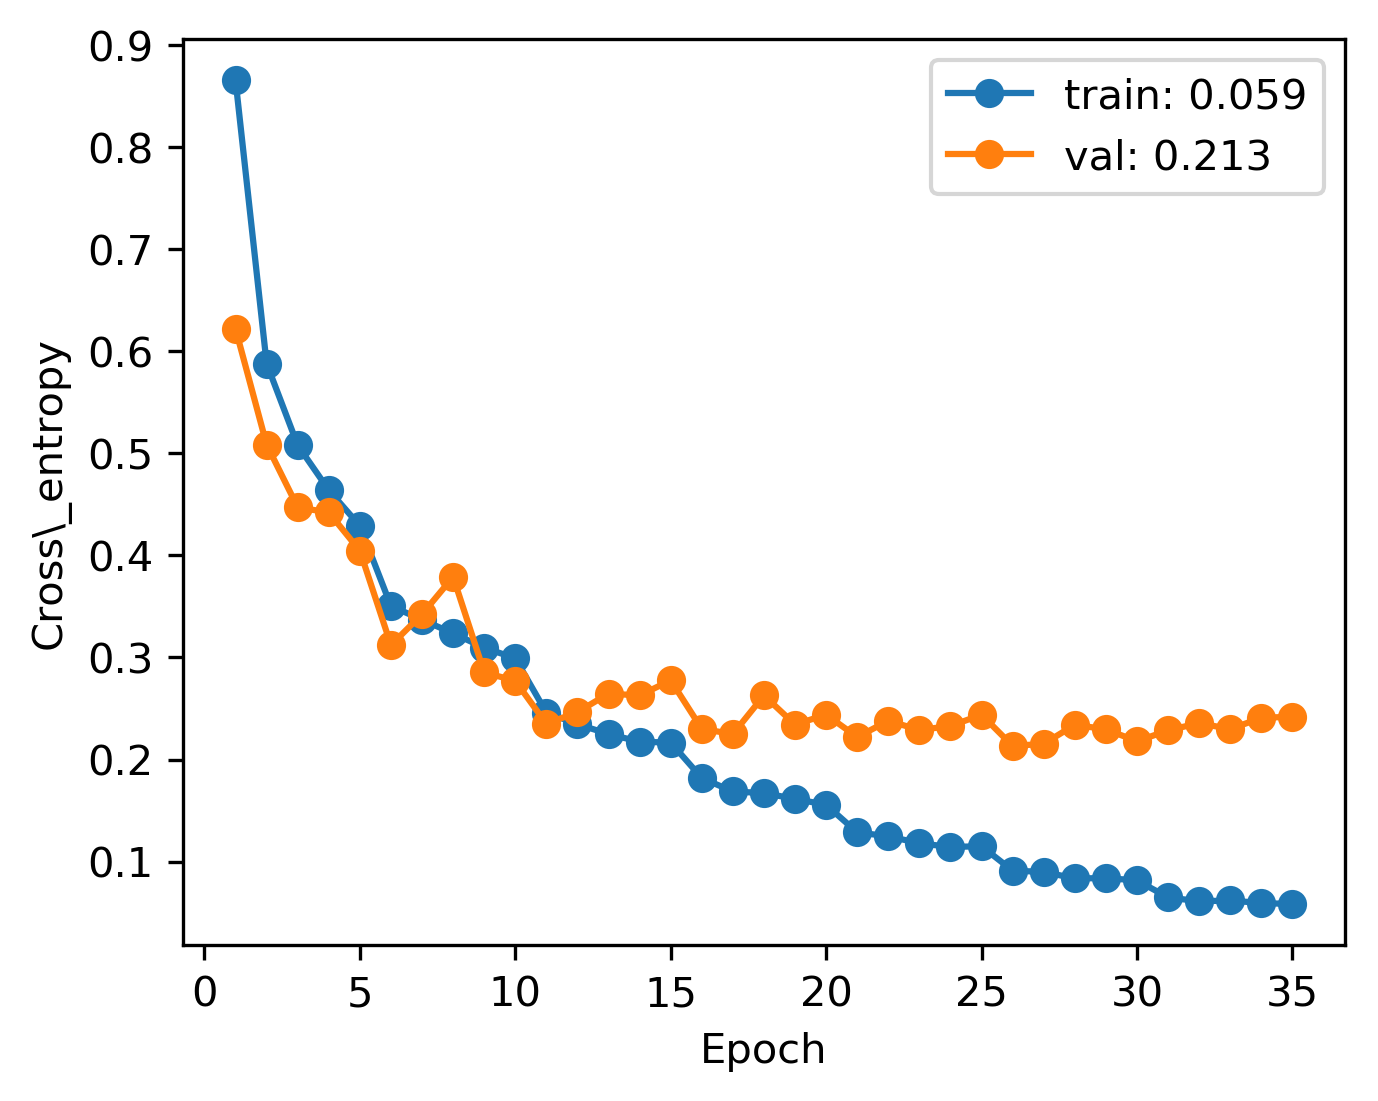

In [24]:
my_nn_functions.plot_history(loss_hist, 'Cross\_entropy', 'resnet18')